In [1]:
using Plots

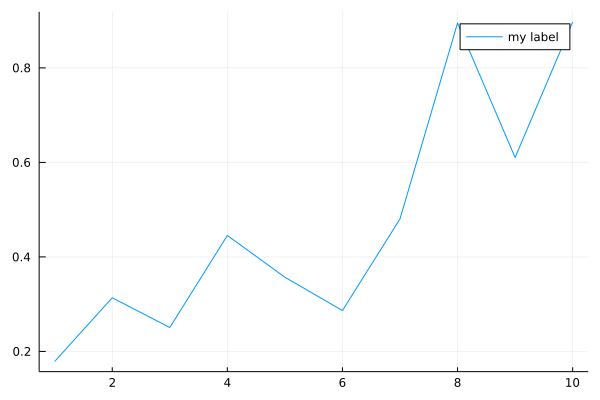

In [2]:
x = 1:10; y = rand(10); # These are the plotting data 
plot(x,y, label="my label")

In [3]:
using CSV
using DataFrames

In [4]:
d = CSV.read("london2018.csv", DataFrame)

,Year,Month,Tmax,Tmin,Rain,Sun
,Int64,Int64,Float64,Float64,Float64,Float64
1,2018,1,9.7,3.8,58.0,46.5
2,2018,2,6.7,0.6,29.0,92.0
3,2018,3,9.8,3.0,81.2,70.3
4,2018,4,15.5,7.9,65.2,113.4
5,2018,5,20.8,9.8,58.4,248.3
6,2018,6,24.2,13.1,0.4,234.5
7,2018,7,28.3,16.4,14.8,272.5
8,2018,8,24.5,14.5,48.2,182.1
9,2018,9,20.9,11.0,29.4,195.0


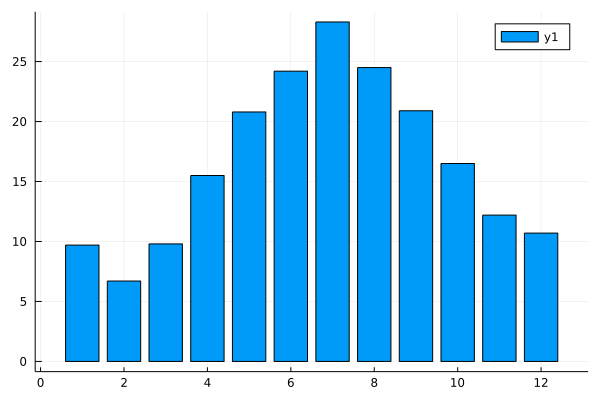

In [5]:
bar(d.Month, d.Tmax)

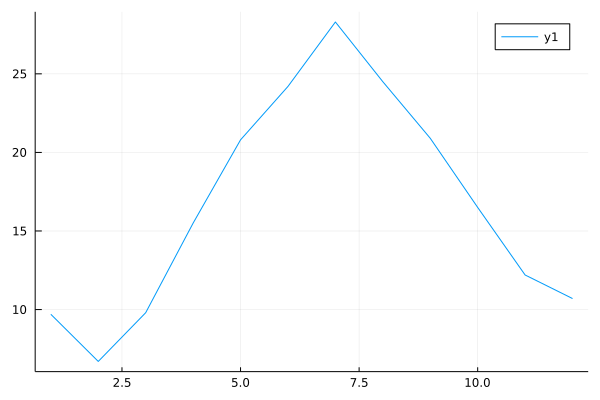

In [6]:
plot(d.Month, d.Tmax)

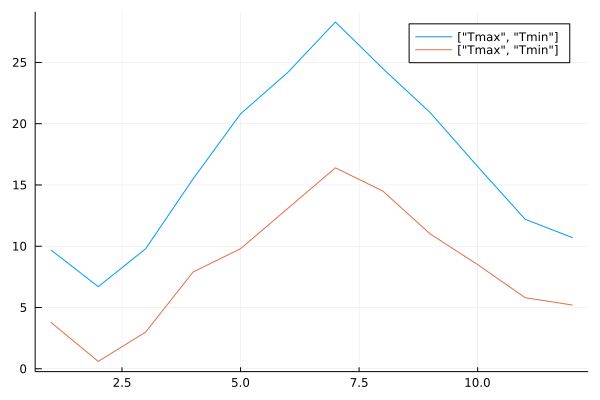

In [7]:
plot(d.Month, [d.Tmax, d.Tmin], label=["Tmax","Tmin"])

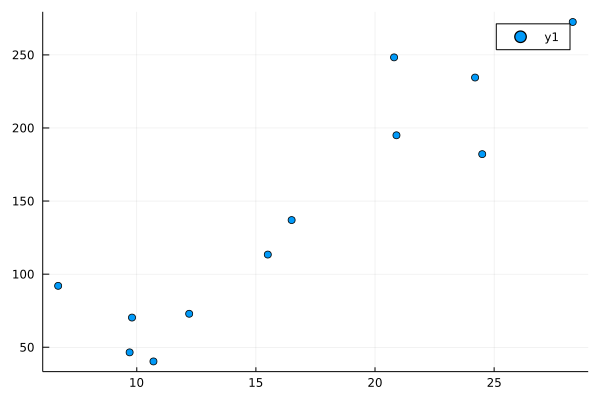

In [8]:
scatter(d.Tmax, d.Sun)

In [9]:
d2 = CSV.read("londonweather.csv", DataFrame)

,Year,Month,Tmax,Tmin,Rain,Sun
,Int64,Int64,Float64,Float64,Float64,Float64
1,1957,1,8.7,2.7,39.5,53.0
2,1957,2,9.0,2.9,69.8,64.9
3,1957,3,13.9,5.7,25.4,96.7
4,1957,4,14.2,5.2,5.7,169.6
5,1957,5,16.2,6.5,21.3,195.0
6,1957,6,23.6,10.7,22.4,284.5
7,1957,7,22.5,13.8,87.0,152.3
8,1957,8,21.1,12.5,86.2,154.4
9,1957,9,17.6,10.1,51.7,88.5


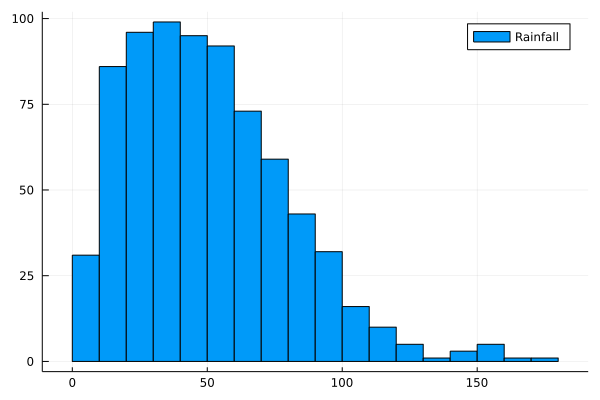

In [10]:
histogram(d2.Rain, label="Rainfall")

In [11]:
using DifferentialEquations

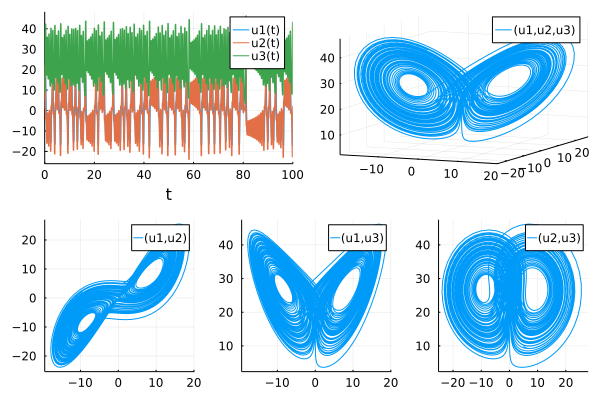

In [2]:
using DifferentialEquations, Plots
function lorenz(du,u,p,t)
 du[1] = p[1]*(u[2]-u[1])
 du[2] = u[1]*(p[2]-u[3]) - u[2]
 du[3] = u[1]*u[2] - p[3]*u[3]
end

u0 = [1., 5., 10.]
tspan = (0., 100.)
p = (10.0,28.0,8/3)
prob = ODEProblem(lorenz, u0, tspan,p)
sol = solve(prob)
xyzt = plot(sol, plotdensity=10000,lw=1.5)
xy = plot(sol, plotdensity=10000, vars=(1,2))
xz = plot(sol, plotdensity=10000, vars=(1,3))
yz = plot(sol, plotdensity=10000, vars=(2,3))
xyz = plot(sol, plotdensity=10000, vars=(1,2,3))
plot(plot(xyzt,xyz),plot(xy, xz, yz, layout=(1,3),w=1), layout=(2,1))